### NAME:- LOKENDRA SINGH RATHORE


##### DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE

### TASK 4

#### MAIL SPAM DETECTION WITH MACHINE LEARNING

#### IMPORT LIBRARY


In [81]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#### READING DATA

In [82]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


#### DROP NULL DATA


In [83]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


#### ENCODING

In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


#### TRAIN AND TEST  DATA SPLITING

In [85]:
X=df.iloc[:,-1]
y=df.iloc[:,0]

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
#Multinomial Naive Bayes: Used for discrete count data.
#Suitable for text classification problems like spam detection,
#where the features are word counts or frequencies.
from sklearn.naive_bayes import MultinomialNB

#### CREATING PIPELINE

In [88]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

#### CLASSIFICATION 1

In [89]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [90]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9883408071748879
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       972
           1       0.97      0.94      0.95       143

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



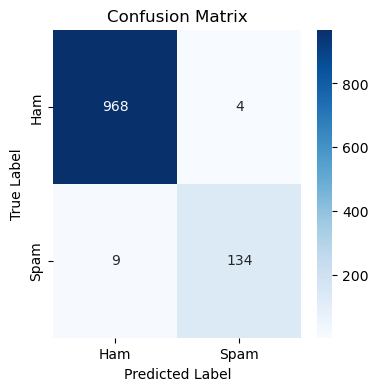

In [91]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
clf2 = Pipeline([ 
    ('vectorizer', TfidfVectorizer()),     
    ('classifier', MultinomialNB())   
])

In [94]:
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

In [95]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred2)
print(report)

Accuracy: 0.9560538116591928
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       972
           1       1.00      0.66      0.79       143

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.88      1115
weighted avg       0.96      0.96      0.95      1115



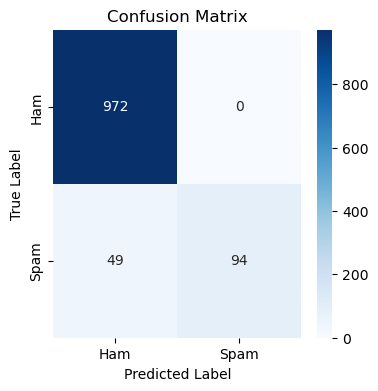

In [96]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred2)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### MODEL GENERATION

In [97]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [99]:
import re
def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    
    # Tokenize
    words = word_tokenize(text)
    
    #Remove stopwords and stem
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

In [100]:
class TextPreprocessor:
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [preprocess_text(text) for text in X]

In [101]:
clf1 = Pipeline([
    ('preprocessor', TextPreprocessor()),  
    ('vectorizer', TfidfVectorizer()),     
    ('classifier', MultinomialNB())   
])

In [102]:
clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)

In [103]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred1)
print(report)


Accuracy: 0.9641255605381166
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       972
           1       0.99      0.73      0.84       143

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.96      0.96      1115



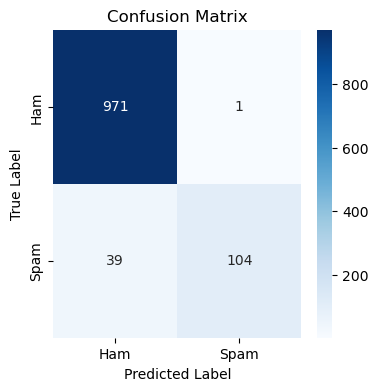

In [104]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred1)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()